# Part 1. Single Video Analysis


## Load Data

In [1]:
import pandas as pd
import os
from PIL import Image

video = 'ad-be'
processed_video_dir = os.path.join('processed', video)
df = pd.read_pickle(os.path.join('processed', video + '.pkl'))

Split the dataframe for simpler access.

In [2]:
filename = df.iloc[:]['filename']
detections = df.iloc[:]['detections']
poses = df.iloc[:]['poses']
faces = df.iloc[:]['faces']
text = df.iloc[:]['text']
embedding = df.iloc[:]['embedding']
fer = df.iloc[:]['fer']

print(filename[208])

img01405.jpeg


In [3]:
def display_img(video, filename):
    img = Image.open(video + '/' + filename)
    display(img)

## Split the video in the different scenes

We will use clustering to achieve this.

In [4]:
n_frames = len(embedding)
embedding_size = len(embedding[0])

### PCA and KMeans Clustering

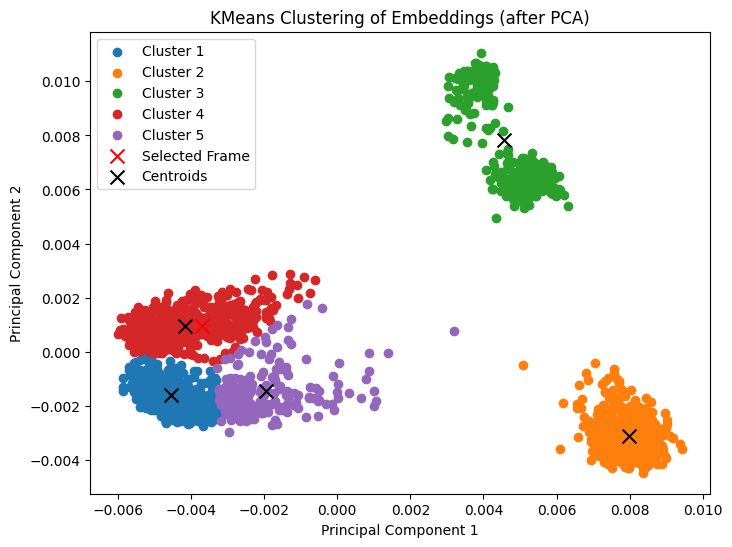

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Assuming 'embedding' is a DataFrame or Series containing arrays
embeddings = np.vstack(df['embedding'])  # Convert the column to a 2D NumPy array

# Calculate L2 norm
norm = np.linalg.norm(embeddings)

# Normalize the vector
normalized_vector = embeddings / norm

# Apply PCA
pca = PCA(n_components=2)  # You can adjust n_components
embeddings_pca = pca.fit_transform(normalized_vector)


# Perform K-means clustering on the reduced data
num_clusters = 5  # Adjust according to your video
kmeans = KMeans(n_clusters=num_clusters)
cluster_assignments = kmeans.fit_predict(embeddings_pca)

scenes = [[] for _ in range(num_clusters)]


for i, cluster in enumerate(cluster_assignments):
    scenes[cluster].append(i)

clst = 4 #Clusters 1-5
frame = 2

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_points = embeddings_pca[cluster_assignments == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Highlight the point corresponding to the selected frame
frame_point = embeddings_pca[scenes[clst-1][frame]]
plt.scatter(frame_point[0], frame_point[1], color='red', marker='x', s=100, label='Selected Frame')

#for i in scenes[4]:
    #display_img(video, filename[i])

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.title('KMeans Clustering of Embeddings (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### t-SNE

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\maria\\OneDrive - Universidade de Lisboa\\MEEC\\PBD\\processed\\ad-be\\img01908.jpeg'

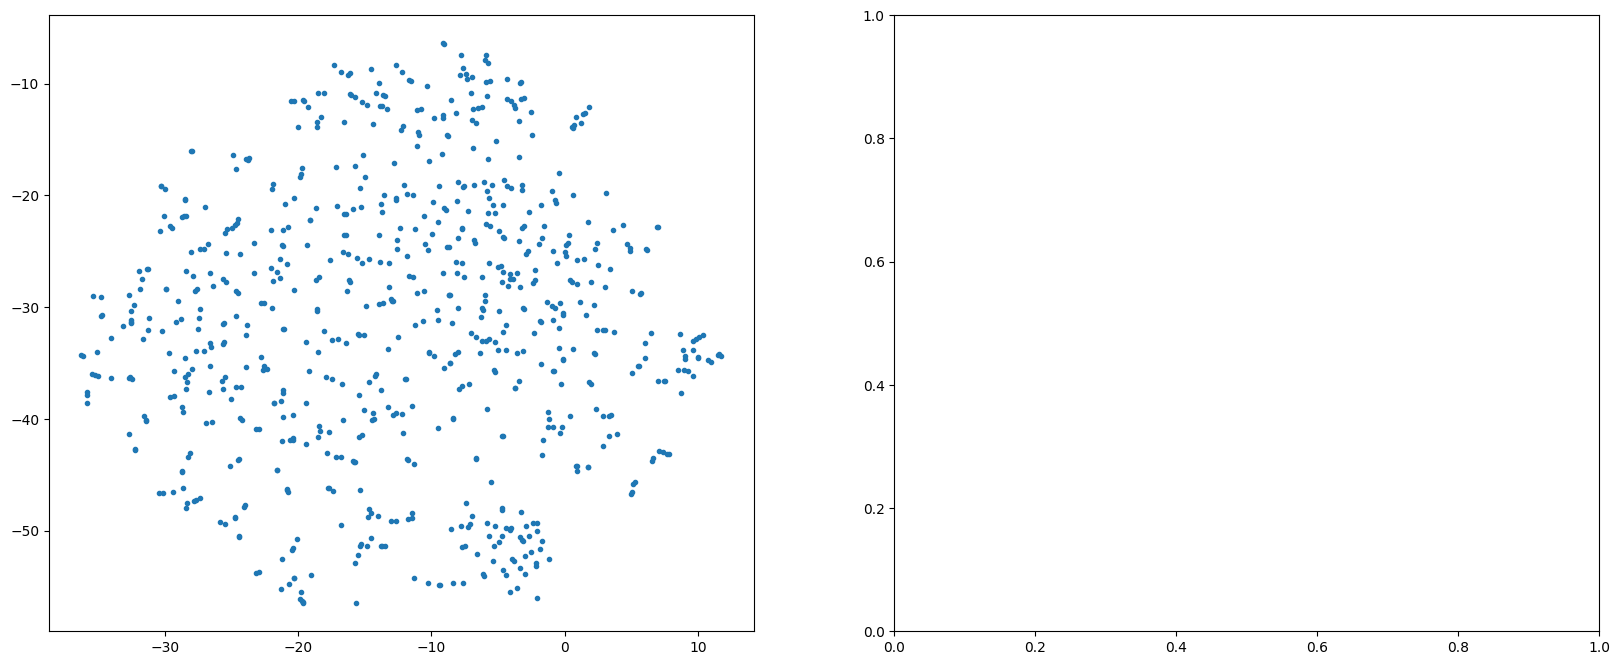

In [6]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
from PIL import Image

# Set random seed for reproducibility
np.random.seed(42)

# Assuming 'embedding' is a DataFrame or Series containing arrays
embeddings = np.vstack(df['embedding'])  # Convert the column to a 2D NumPy array

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform your data
embeddings_tsne = tsne.fit_transform(embeddings)

# Perform K-means clustering on the reduced data
num_clusters = 5 # perform elbow for the next phase 
kmeans = KMeans(n_clusters=num_clusters)
cluster_assignments = kmeans.fit_predict(embeddings)

scenes = [[] for _ in range(num_clusters)]

for i, cluster in enumerate(cluster_assignments):
    scenes[cluster].append(i)

# Plot clusters and images in a single figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for i in range(len(np.unique(cluster_assignments))):
    ax1.scatter(embeddings_tsne[cluster_assignments == i, 0], 
                embeddings_tsne[cluster_assignments == i, 1], 
                label=f'Cluster {i}', 
                marker='.')
    
    random_indexes = random.sample(range(len(scenes[i])), min(1, len(scenes[i])))
    random_frames = [scenes[i][idx] for idx in random_indexes]

    for idx in random_frames:
        image_path = os.path.join('processed', video, filename[idx])
        image = Image.open(image_path)
        imagebox = OffsetImage(image, zoom=0.1)
        ab = AnnotationBbox(imagebox, embeddings_tsne[idx], frameon=False)
        ax2.add_artist(ab)

ax1.set_title('t-SNE Visualization with Clusters')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.legend()

ax2.set_title('Random Frames from Clusters')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax2.axis('on')

plt.show()


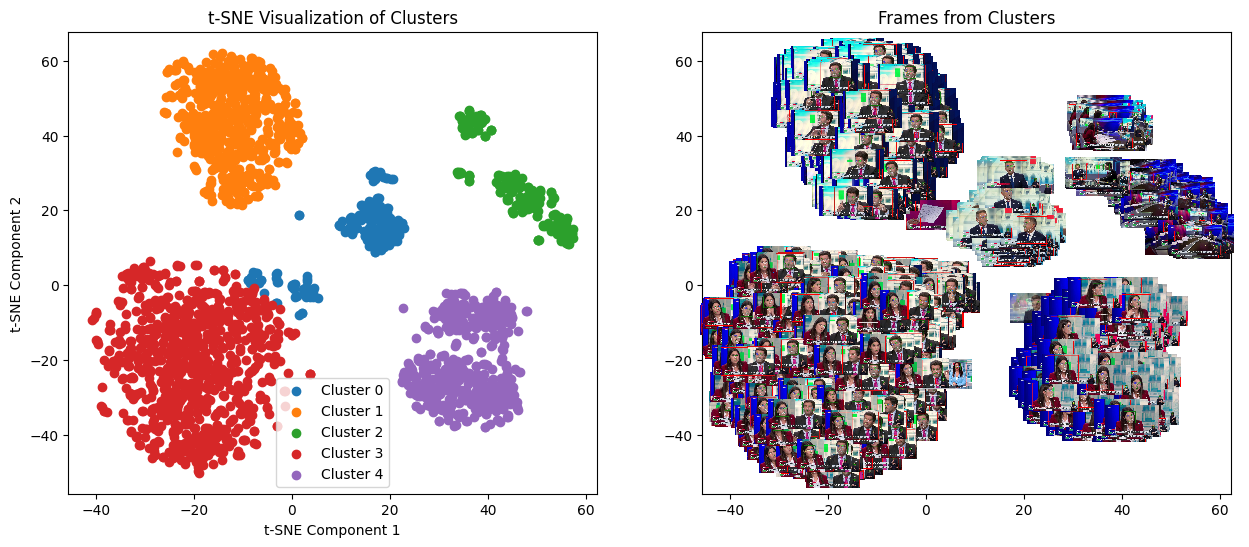

In [ ]:
# Adjust the overall figure dimensions and the zoom level of embedded images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  

for i in range(num_clusters):
    ax1.scatter(embeddings_tsne[cluster_assignments == i, 0], embeddings_tsne[cluster_assignments == i, 1], label=f'Cluster {i}')
    
    # Adding images to the plot, with reduced zoom
    for idx in scenes[i]:
        image_path = os.path.join('processed', video, filename[idx])
        image = Image.open(image_path)
        imagebox = OffsetImage(image, zoom=0.03)  # Reduced zoom
        ab = AnnotationBbox(imagebox, embeddings_tsne[idx], frameon=False)
        ax2.add_artist(ab)

ax1.set_title('t-SNE Visualization of Clusters')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.legend()

ax2.set_title('Frames from Clusters')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax2.axis('on')

plt.show()

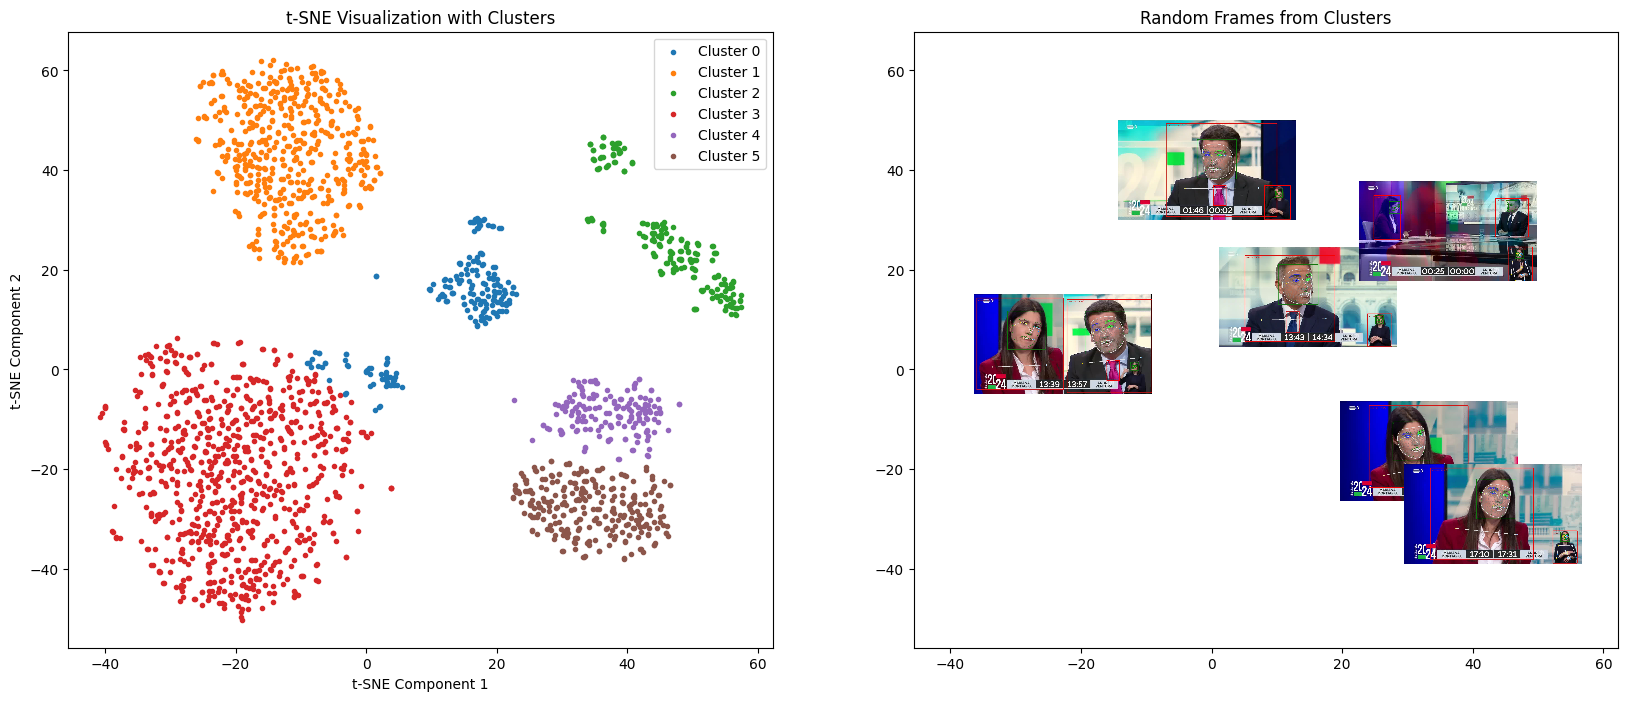

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
from PIL import Image

# Set random seed for reproducibility
np.random.seed(42)

# Assuming 'embedding' is a DataFrame or Series containing arrays
embeddings = np.vstack(df['embedding'])  # Convert the column to a 2D NumPy array

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform your data
embeddings_tsne = tsne.fit_transform(embeddings)

# Perform K-means clustering on the reduced data
num_clusters = 5 # perform elbow for the next phase 
kmeans = KMeans(n_clusters=num_clusters)
cluster_assignments = kmeans.fit_predict(embeddings_tsne)

scenes = [[] for _ in range(num_clusters)]

for i, cluster in enumerate(cluster_assignments):
    scenes[cluster].append(i)

# Plot clusters and images in a single figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for i in range(len(np.unique(cluster_assignments))):
    ax1.scatter(embeddings_tsne[cluster_assignments == i, 0], 
                embeddings_tsne[cluster_assignments == i, 1], 
                label=f'Cluster {i}', 
                marker='.')
    
    random_indexes = random.sample(range(len(scenes[i])), min(1, len(scenes[i])))
    random_frames = [scenes[i][idx] for idx in random_indexes]

    for idx in random_frames:
        image_path = os.path.join('processed', video, filename[idx])
        image = Image.open(image_path)
        imagebox = OffsetImage(image, zoom=0.1)
        ab = AnnotationBbox(imagebox, embeddings_tsne[idx], frameon=False)
        ax2.add_artist(ab)

ax1.set_title('t-SNE Visualization with Clusters')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.legend()

ax2.set_title('Random Frames from Clusters')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax2.axis('on')

plt.show()


## With Elbow Analysis

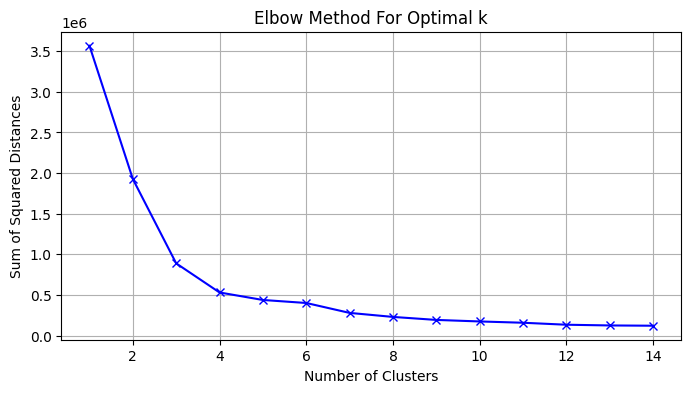

In [ ]:
np.random.seed(42)

# Assuming 'df' is a DataFrame and 'embedding' is a column in that DataFrame
embeddings = np.vstack(df['embedding'])  # Convert the column to a 2D NumPy array

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Determine the optimal number of clusters using the elbow method
K = range(1, 15)  # Adjust this range based on your dataset size and domain knowledge
sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(embeddings_tsne)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [ ]:

# Assuming 'embedding' is a DataFrame or Series containing arrays
embeddings = np.vstack(df['embedding'])  # Convert the column to a 2D NumPy array

# Perform K-means clustering on the reduced data
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
cluster_assignments = kmeans.fit_predict(embeddings)

scenes = [[] for _ in range(num_clusters)]

for i, cluster in enumerate(cluster_assignments):
    scenes[cluster].append(i)

# Plot clusters and images in a single figure with adjusted subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for i in range(num_clusters):
    ax1.scatter(embeddings_tsne[cluster_assignments == i, 0], embeddings_tsne[cluster_assignments == i, 1], label=f'Cluster {i}')
    
    # Adding images to the plot, with reduced zoom
    for idx in scenes[i]:
        image_path = os.path.join('processed', video, filename[idx])
        image = Image.open(image_path)
        imagebox = OffsetImage(image, zoom=0.03)  # Reduced zoom for better clarity
        ab = AnnotationBbox(imagebox, embeddings_tsne[idx], frameon=False)
        ax2.add_artist(ab)

ax1.set_title('t-SNE Visualization of Clusters')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.legend()

ax2.set_title('Frames from Clusters')
ax2.set_xlim(ax1.get_xlim())  # Ensure consistent axis scale for comparison
ax2.set_ylim(ax1.get_ylim())
ax2.axis('on')  # Keep axis visible

plt.show()

-use spectral clustering